In [1]:
import numpy as np
import sklearn, os, sys
from sklearn import svm
from skimage import data, io, filters
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data
from utils import plot

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [3]:
dataset = data.init_dataset()

In [4]:
face_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_eye.xml')

In [5]:
os.listdir('../haarcascades')

['haarcascade_eye.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_profileface.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_upperbody.xml']

In [6]:
img_name = '../datasets/train/' + dataset.train[0]
img_name = '../datasets/train/' + '0cbdda18846cd014dcb0e18fa67f3f98.jpg'
# img_name = '../datasets/train/' + '0c19867277e6c96ad8f487b4fe343ff9.jpg'
img_name

'../datasets/train/0cbdda18846cd014dcb0e18fa67f3f98.jpg'

In [7]:
# Note that cv2 uses different formatting than skimage
img = cv2.imread(img_name)
print(img[0][0:3])
img = skimage.io.imread(img_name)
print(img[0][0:3])
type(img)

[[198 182 166]
 [198 182 166]
 [198 182 166]]
[[166 182 198]
 [166 182 198]
 [166 182 198]]


numpy.ndarray

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


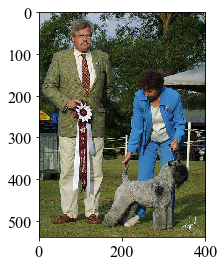

In [8]:
skimage.io.imshow(img_name)

In [9]:
gray = cv2.cvtColor(img, 6) # COLOR_BGR2GRAY

In [10]:
# default params: scale=1.3, nn=5
# https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
# minSize and maxSize are not specified
scaleFactor = 1.2 # should be > 1
minNeighbors = 1
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

In [17]:

# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection
def draw_rectangles(img,faces=[],min_eyes=2):
    real_faces = []
    img_ = img.copy()
    for (x,y,w,h) in faces:
        img_ = cv2.rectangle(img_,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=1)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        # save the faces that contain at least 1 eye
        if len(eyes) > min_eyes:
            real_faces.append([x,y,w,h])
    return img_, real_faces

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


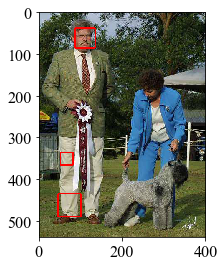

In [22]:
# cv2.imshow('img',img)
img_,real_faces = draw_rectangles(img,faces,min_eyes=-1)
skimage.io.imshow(img_)

In [20]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Remove faces from img

In [49]:
# some img mutation functions

def replace(v1,v2):
    return v2

def add(v1,v2):
    # mean of r,g,b
    return np.mean([v1,v2] ,axis=0)
    # return v1 + np.minimum(v1, v2) / 2

def overlay(v1,v2):
    # add smallest element values
    intermediate = np.minimum(v1, v2)
    return v1 + intermediate # np.minimum(v1,v2)

def sample_from_img(img,_):
    # TODO do not cross-sample
    return [ np.random.choice(img) for _ in range(3) ]

def random_img(dims=(10,10,3)):
    return np.random.randint(0,255,size=dims,dtype=np.uint8)


def add_img(img,img2,x,y,f=replace):
    # np index: [y][x]
    max_y, max_x = img.shape[0:2]
    h,w = img2.shape[0:2]
    xs = np.clip(np.arange(x,x + w), 0, max_x - 1)
    ys = np.clip(np.arange(y,y + h), 0, max_y -1)
    print('sha',img.shape)
    for i,x in enumerate(xs): 
        for j,y in enumerate(ys):
            # y is the first index
            img[y,x] = f(img[y,x],img2[j,i])
            
    return img

def add_img2(img,img2,x,y,f=replace):
    # np index: [y][x]
    max_y, max_x = img.shape[0:2]
    h,w = img2.shape[0:2]
    xs = np.clip(np.arange(x,x + w), 0, max_x - 1)
    ys = np.clip(np.arange(y,y + h), 0, max_y -1)
    print('sha',img.shape)
    for i,x in enumerate(xs): 
        for j,y in enumerate(ys):
            # y is the first index
            img[y,x] = f(img,img2)
            
    return img

# def convert_coordinates(x,y,w,h,shape):
#     w,h = shape[0:2]
#     y = h - y
#     return x,y

In [51]:
# for every img
f = sample_from_img # this is a function
for (x,y,w,h) in real_faces:
    dims = (w,h,3) # rgb = 3
    # censoring_box = random_img(dims)
    print('shape', box.shape)
    # img = add_random(img,replace,dims)
    print('s',img.shape)
    img = add_img2(img,box,x,y,f)

shape (55, 55, 3)
s (539, 400, 3)
sha (539, 400, 3)


ValueError: a must be 1-dimensional

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


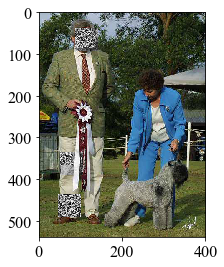

In [44]:
skimage.io.imshow(img)

In [45]:
img.shape

(539, 400, 3)

In [41]:
(img[0][0:3])

array([[166, 182, 198],
       [166, 182, 198],
       [166, 182, 198]], dtype=uint8)

In [28]:
# y,x = 0,0 is the uppermost-rightmost corner
a = np.arange(9)
a = a.reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [29]:
a[2][0]

6

In [30]:
a.copy()

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])